# Life Expectancy Regression Analysis

Here, we will analyze the factors that affect the life expectancy of a person by doing a data analysis, and later, we will develop a model to predict life expectancy and see how it has been defined based on given parameters.

# Import Libreries

In [1]:
import warnings
import numpy as np
import pandas as pd 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.options.mode.chained_assignment = None

In [2]:
life_expectancy_data = pd.read_csv("data/Life_Expectancy_Data.csv")
life_expectancy_data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### Let's see countries with highest & lowest life expectancy

In [3]:
# Countries with Highest Life Expectancy
country_vs_life = life_expectancy_data.groupby('Country', as_index=False)['Life expectancy '].mean()
country_vs_life.sort_values(by = 'Life expectancy ', ascending=False).head(10)

,Country,Life expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
82,Italy,82.18750
160,Spain,82.06875
7,Australia,81.81250
125,Norway,81.79375
30,Canada,81.68750


In [4]:
# Countries with Lowest Life Expectancy
country_vs_life.sort_values(by = 'Life expectancy ', ascending=True).head(10)

,Country,Life expectancy
152,Sierra Leone,46.11250
31,Central African Republic,48.51250
94,Lesotho,48.78125
3,Angola,49.01875
100,Malawi,49.89375
32,Chad,50.38750
44,Côte d'Ivoire,50.38750
192,Zimbabwe,50.48750
164,Swaziland,51.32500
123,Nigeria,51.35625


A bubble chart will be made to visualize the graph of life expectancy versus GDP. Where the size of the bubble determines the population of that particular country and the color indicates the continent of the country. 

In [5]:
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
continent = []
for country in life_expectancy_data['Country']:
    try:
        continent.append(continents[(country_alpha2_to_continent_code(country_name_to_country_alpha2(country)))])
    except:
        continent.append("Africa")
    
life_expectancy_data["Continent"] = continent
to_bubble = life_expectancy_data[["Country", "Year", "Life expectancy ", "GDP", "Population", "Continent"]]
to_bubble.dropna(inplace = True)

In [6]:
df = px.data.gapminder()

fig = px.scatter(to_bubble, x="GDP", y="Life expectancy ",
                 size="Population", color="Continent",
                 hover_name="Country", log_x=True, size_max=50)

fig.show()

We extracted following results from the bubble plot:

1. Most of the African Countries has lowest life expectancy.
2. Countries having high GDP also has high life expectancy.
3. Most of the european countries has high GDP as well as high life expectancy.
4. Most of the asian countries have high population and life expectancy between 60 to 70.
5. Overall life expectancy and GDP has a linear relationship.

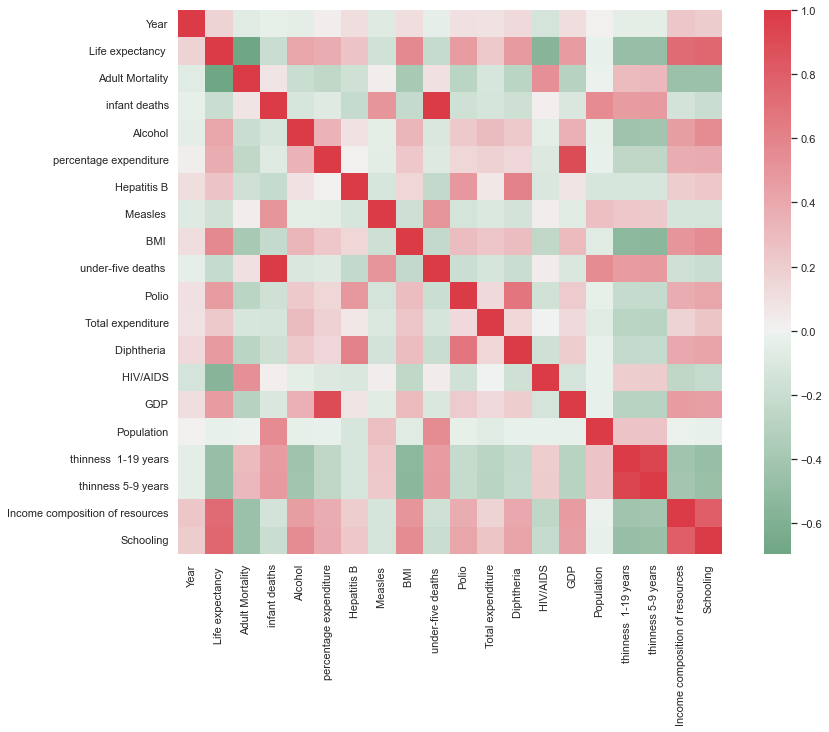

In [7]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(life_expectancy_data.corr(), cmap=cmap, center=0, annot=False, square=True);

Evidence of negative correlation between Life expectancy and Diseases can be seen in the  heatmap. Whereas, Income and Schooling has a strong positive correlation with Life expectancy. Life expectancy has a positive correlation with vaccines of Hepatitis B, Polio, and Diphtheria which explains a higher life span for those who are vaccinated. Both infant and adult mortality have a negative correlation with Life expectancy which is also very intuitive.

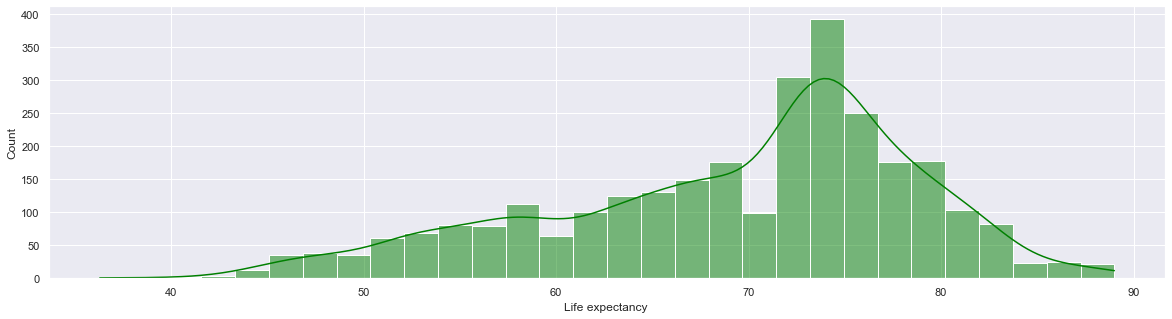

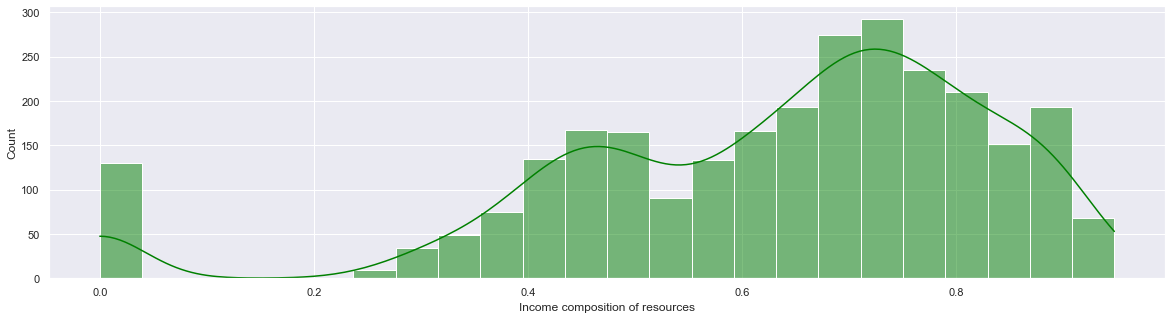

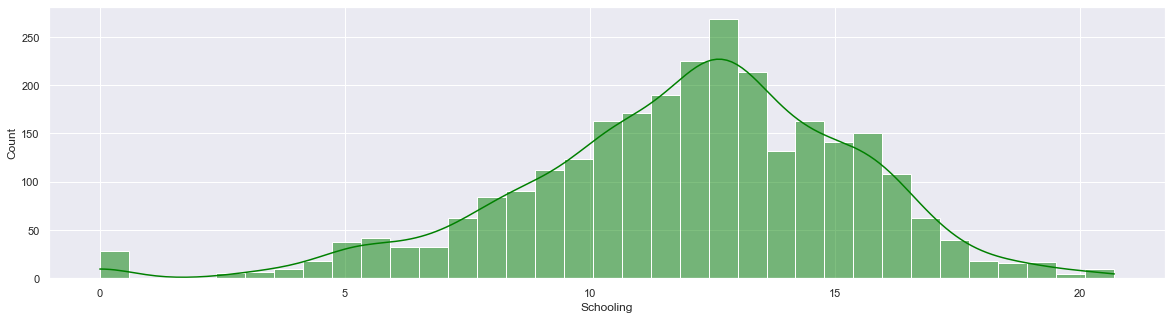

In [8]:
l= [life_expectancy_data['Life expectancy '].dropna(), life_expectancy_data['Income composition of resources'].dropna(), life_expectancy_data['Schooling'].dropna()]
for i in l:
    plt.figure(figsize=(20,5))
    sns.histplot(i, kde=True, color="green")

Life expectncy has a dense distribution between 70 - 76 years.

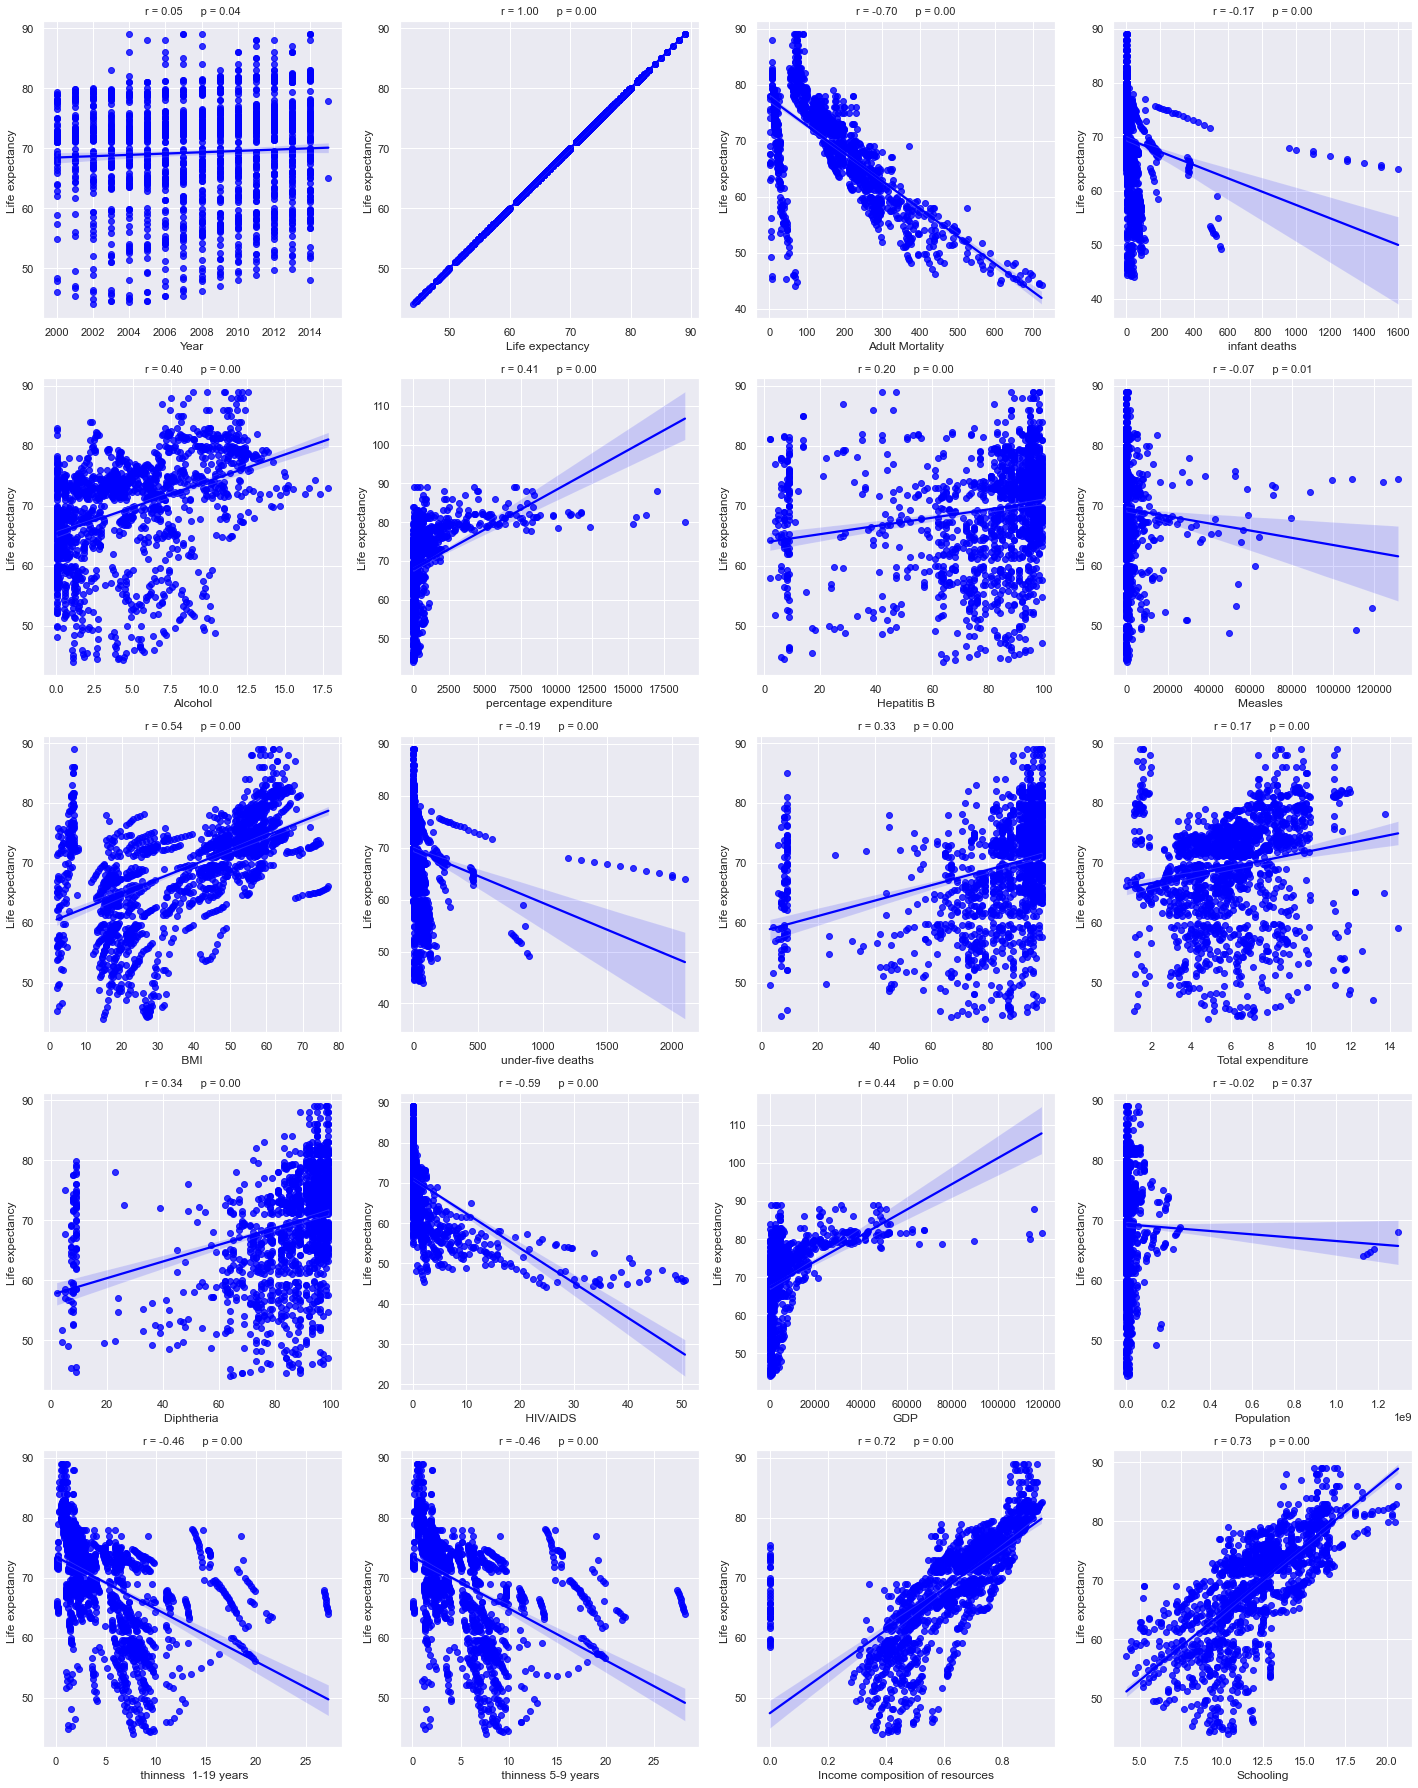

In [9]:
nr_rows = 5
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5,nr_rows*5))
numerical_feats = life_expectancy_data.dtypes[life_expectancy_data.dtypes != "object"].index
li_num_feats = list(numerical_feats)
li_not_plot = []
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]
life_expectancy_data.dropna(inplace = True)

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(x = life_expectancy_data[li_plot_num_feats[i]],y = life_expectancy_data["Life expectancy "] , color = 'blue', ax = axs[r][c])
            stp = stats.pearsonr(life_expectancy_data[li_plot_num_feats[i]], life_expectancy_data["Life expectancy "])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)

plt.tight_layout()
sns.set(color_codes=True)
plt.show();

Above plot explains following trends:

* Over the year, life expectancy has been increased slightly.
* Life expectancy decreases with increase in infant's death.
* Countries with high alchol consumption has high life expectancy. (how?)
* BMI and life expectancy has a linear relationship.
* Countries having chronic diseases has lower life expectancies.(Except Few)
* GDP and Life expectancy has a strong linear relationship.
* Countries with high population has slightly low life expectancy.
* As total income composition of a country increases, life expectancy also increases. (If you're rich, you're expected to live a long life)
* Last but not the least, schooling impacts the life expectancy as expected.

## Let's check the impact of Alcohol consumption 

Alcohol consumption and Life expectancy has a positive relation for all the continents except Africa, which is kind of misleading with the intuition.

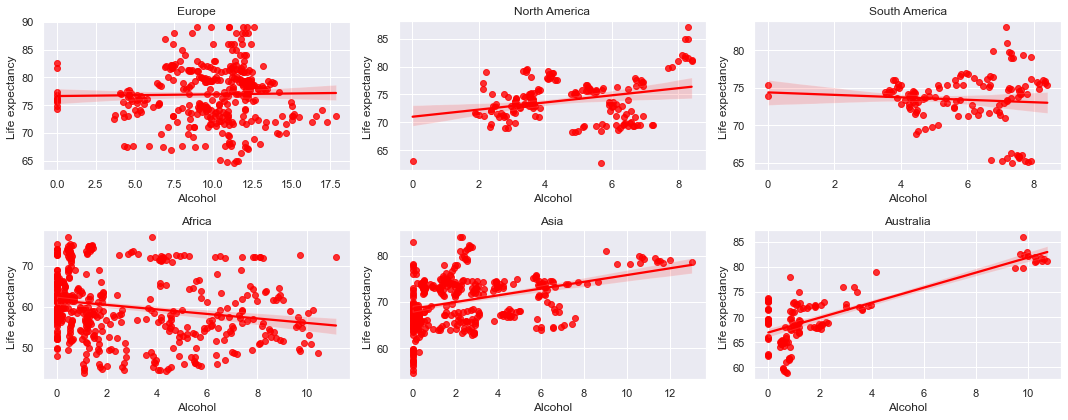

In [10]:
fig, axs = plt.subplots(2,3, figsize=(15,6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.5)

for conts, ax in zip(set(life_expectancy_data["Continent"]), axs.flat):
    Conts = life_expectancy_data[life_expectancy_data["Continent"] == conts]
    sns.regplot(x=Conts['Alcohol'], y=Conts["Life expectancy "], color='red', ax=ax).set_title(conts)

plt.tight_layout()
sns.set(color_codes=True)
plt.show()

### Life Expectancy Estimation Regression Model

Objective is to build a model that can estimate the Life expectancy given all the dependent parameters used in EDA. 

We will evaluate the model with R squared error and Residual Distribution followed by a Conclusion.

In [11]:
target = life_expectancy_data["Life expectancy "]
features = life_expectancy_data[life_expectancy_data.columns.difference(['Life expectancy '])]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(features), target, test_size=0.3)

### Random Search Cross-Validation RF

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
from pprint import pprint

# Look at parameters used by our surrent forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [14]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 4, stop = 200, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [4, 25, 47, 69, 91, 112, 134, 156, 178, 200]}


In [15]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 7 fold cross validation, 
# search across 200 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                                 n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [4, 25, 47, 69, 91, 112,
                                                         134, 156, 178, 200]},
                   random_state=42, verbose=2)

In [16]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [18]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

base_model = RandomForestRegressor() #n_estimators = 10
base_model.fit(X_test, y_test)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy)/base_accuracy))

Model Performance
Average Error: 0.6027 degrees.
Accuracy = 99.09%.
Model Performance
Average Error: 1.1578 degrees.
Accuracy = 98.27%.
Improvement of -0.83%.


### Grid Search with Cross-Validation RF

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 50, None],
    'max_features': [2, 3, 4, 'auto','sqrt'],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [1, 2, 4, 8],
    'n_estimators': [10, 30, 100, 120, 150]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [21]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2400 candidates, totalling 7200 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [       nan        nan        nan ... 0.90026978 0.90180688 0.90227339]



GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 50, None],
                         'max_features': [2, 3, 4, 'auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 2, 4, 8],
                         'n_estimators': [10, 30, 100, 120, 150]},
             verbose=2)

In [22]:
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
print('Improvement of {:0.2f}%.'.format(100 * (grid_accuracy - base_accuracy)/base_accuracy))

{'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
Model Performance
Average Error: 1.1550 degrees.
Accuracy = 98.27%.
Improvement of -0.82%.


In [23]:
model_predictions = best_grid.predict(X_test)
residuals = model_predictions - y_test

Residuals is the difference between the predictions from model and actual of Test data.

Ideally the distribution of these residuals should be normal with mean centered at zero. In our case, it is almost normal and mean is almost centered at 0. Which indicates our model is highly efficient.

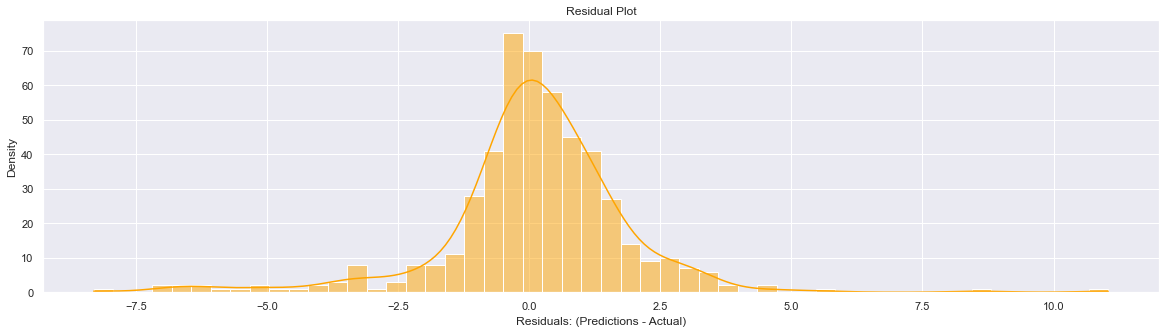

In [25]:
plt.figure(figsize=(20,5))
sns.histplot(residuals, kde=True, color="orange")
plt.title('Residual Plot')
plt.xlabel('Residuals: (Predictions - Actual)')
plt.ylabel('Density');

Let's check the R squared Score for our model

In [26]:
from sklearn.metrics import r2_score
print("R-squared Score Obtained for predicting Life Expectancy is {0}".format(r2_score(y_test, model_predictions)))

R-squared Score Obtained for predicting Life Expectancy is 0.9559652126806186


# Conclusion

One can extend his/her life span by adopting a healthy life-style, proper education, and by getting vaccinated. Ofcourse Demographic location plays an important role. In our analysis, we saw people living in Europe has a higher life-span as compared to other continents. Country's GDP and Income composition affects the Life Expectancy in a broader way.

There are some parameters like pollution and environmental index that has been missing in this analysis and expected to be highly related with Life Expectancy.

Getting Vaccinated for various diseases also increases the expected life span. Consumption of Alcohol and Life expectancy has an unexpected positive relation except for Africa.